In [28]:
#Importing Libraries and Matrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# 1. Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [32]:
# Check for missing values
print(df.isnull().sum()) 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [58]:
# Splitting the dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Why These Preprocessing Steps Are Necessary?

1.Ensures Data Consistency: Scaling puts all features on the same scale, improving model convergence.

2.Prevents Bias Due to Large-Scale Features: Without scaling, algorithms that rely on distance (SVM, k-NN) would be dominated by features with large values.

3.Avoids Overfitting: Proper splitting ensures the model generalizes well rather than memorizing the training data.

4.Handles Missing Values (if any): Though this dataset had none, checking for and handling missing data is a best practice.



In [63]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}


In [65]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]
--------------------------------------------------
Decision Tree Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[39  4]
 [ 3 68]]
--------------------------------------------------
Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        4

1. Logistic Regression  
  How It Works:

Logistic Regression is a statistical model that predicts the probability of a binary outcome using the logistic (sigmoid) function.

It calculates a weighted sum of input features and applies the sigmoid function to map it between 0 and 1.

Why It’s Suitable:  
✅ Works well for linearly separable data.  
✅ Computationally efficient and interpretable.  
✅ Outputs probabilities, helping in medical decision-making.  
❌ May struggle with non-linear relationships.  

2. Decision Tree Classifier  
  How It Works:  

A Decision Tree splits the dataset recursively based on feature values, forming a tree-like structure.

It makes decisions by following a sequence of if-else conditions.

Why It’s Suitable:  
✅ Handles both linear and non-linear relationships.  
✅ Provides interpretability (e.g., "if cell size > X, then likely malignant").  
✅ No need for feature scaling.  
❌ Can overfit if not pruned or regularized.  

3. Random Forest Classifier  
  How It Works:  

A Random Forest is an ensemble of multiple Decision Trees.

It uses bootstrap aggregation (bagging):

Randomly selects subsets of data.

Builds multiple trees.

Averages predictions (for classification, uses majority voting).

Why It’s Suitable:  
✅ Reduces overfitting compared to a single Decision Tree.  
✅ Performs well on large datasets with many features.  
✅ Handles missing values and noisy data well.  
❌ Can be computationally expensive.  

4. Support Vector Machine (SVM)  
  How It Works:  

SVM finds the best hyperplane that separates the two classes with the maximum margin.

Uses kernel trick (linear, polynomial, RBF) to handle non-linear data.

Why It’s Suitable:  
✅ Works well when the classes are well-separated.  
✅ Robust to high-dimensional data (30 features in this dataset).  
✅ Can handle non-linearity with appropriate kernels.  
❌ Computationally expensive on large datasets.  
❌ Sensitive to feature scaling.  

5. k-Nearest Neighbors (k-NN)  
  How It Works:  

Classifies a new data point by finding the K closest data points (neighbors) and taking a majority vote.

Uses distance metrics like Euclidean distance.

Why It’s Suitable:  
✅ Simple and non-parametric (no assumption about data distribution).  
✅ Works well with small to medium-sized datasets.  
✅ Can detect complex decision boundaries.  
❌ Computationally expensive for large datasets (distance calculation for all points).  
❌ Performance depends on choosing the right K value.  

Which Model Might Perform Best?  
Random Forest or SVM are likely to perform best because:  
✅ Random Forest is robust against overfitting and can handle non-linearity.  
✅ SVM is great at handling high-dimensional data and finding optimal decision boundaries.  

Logistic Regression might perform well if the data is mostly linearly separable.

Decision Trees and k-NN might be more prone to overfitting or computational inefficiency.

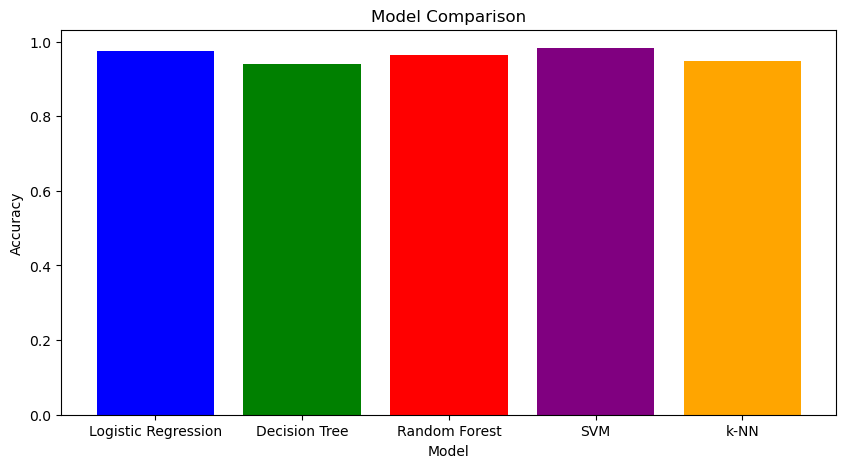

In [67]:
# Compare model performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

Model	Accuracy:  
Logistic Regression	0.9737  
Decision Tree	0.9386 
Random Forest	0.9649  
SVM	0.9825  
k-NN	0.9474  

Best Performing Model is SVM  with an Accuracy of 0.9825  
Decision tree is the worst performing model with an Accuracy of 0.9386


In [69]:
# Print best and worst models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f"Best Performing Model: {best_model} with Accuracy {results[best_model]:.4f}")
print(f"Worst Performing Model: {worst_model} with Accuracy {results[worst_model]:.4f}")


Best Performing Model: SVM with Accuracy 0.9825
Worst Performing Model: Decision Tree with Accuracy 0.9386
